In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [44]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
file_path = '/content/drive/MyDrive/HTF4_final/data/Retail_sale.xlsx'  # Đường dẫn đến file Excel của bạn
sheet1 = pd.read_excel(file_path, sheet_name='10.SE Regional Sales')
sheet2 = pd.read_excel(file_path, sheet_name='11.SE Regional Sales')
sheet3 = pd.read_excel(file_path, sheet_name='12.SE Regional Sales')
customer = pd.read_excel(file_path, sheet_name='Customer')
sale = pd.read_excel(file_path, sheet_name='Sale')
sale


,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
0,1001,Hughes,Lewis,1234,Clothing,2022-10-11,16,Delivered,LA,1485,1880,395,Kelly,NaN
1,1002,Gomez,Ali,1235,Home & Kitchen,2022-10-09,11,Delivered,LA,1310,1602,292,Brian,NaN
2,1003,Beck,Mila,1236,Personal Care,2022-10-21,4,Shipped,GA,800,891,91,Terrence,NaN
3,1004,Juarez,Ryleigh,1237,Personal Care,2022-10-26,20,Cancelled,NC,1190,1462,272,Brian,Defective
4,1005,Preston,Leonidas,1238,Electronics,2022-10-22,9,Shipped,GA,470,525,55,Daniel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Robbins,Crew,2227,Pets,2022-12-23,12,Shipped,LA,1465,1865,400,Daniel,NaN
2996,3997,Salinas,Willow,2228,Books,2022-12-25,4,Cancelled,GA,890,1050,160,Kelly,Quality Issue
2997,3998,Bond,Malachi,2229,Pets,2022-12-23,20,Shipped,LA,825,1059,234,Daniel,NaN
2998,3999,Willis,Patrick,2230,Sports & Outdoors,2022-12-14,16,Shipped,LA,875,1116,241,Priscilla,NaN


# Sale: Descriptive Statistic

In [4]:
sale.head()

,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
0,1001,Hughes,Lewis,1234,Clothing,2022-10-11,16,Delivered,LA,1485,1880,395,Kelly,NaN
1,1002,Gomez,Ali,1235,Home & Kitchen,2022-10-09,11,Delivered,LA,1310,1602,292,Brian,NaN
2,1003,Beck,Mila,1236,Personal Care,2022-10-21,4,Shipped,GA,800,891,91,Terrence,NaN
3,1004,Juarez,Ryleigh,1237,Personal Care,2022-10-26,20,Cancelled,NC,1190,1462,272,Brian,Defective
4,1005,Preston,Leonidas,1238,Electronics,2022-10-22,9,Shipped,GA,470,525,55,Daniel,NaN


In [5]:
sale.tail()

,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
2995,3996,Robbins,Crew,2227,Pets,2022-12-23,12,Shipped,LA,1465,1865,400,Daniel,NaN
2996,3997,Salinas,Willow,2228,Books,2022-12-25,4,Cancelled,GA,890,1050,160,Kelly,Quality Issue
2997,3998,Bond,Malachi,2229,Pets,2022-12-23,20,Shipped,LA,825,1059,234,Daniel,NaN
2998,3999,Willis,Patrick,2230,Sports & Outdoors,2022-12-14,16,Shipped,LA,875,1116,241,Priscilla,NaN
2999,4000,Compton,Dallas,2231,Electronics,2022-12-13,19,Delivered,NC,45,49,4,Brian,NaN


In [6]:
def clean_headers(columns):
    columns = columns.str.strip().str.replace(' ', '_')
    return columns

In [7]:
sale.columns=clean_headers(sale.columns)

In [8]:
sale

,Order_ID,Customer_Last_Name,Customer_First_Name,Customer_ID,Product_Category,Order_Date,Quantity_Ordered,Order_Status,State,Manufacturer_Price,Sale_Price,Total_Profit,Sales_Agent,Return_Reason
0,1001,Hughes,Lewis,1234,Clothing,2022-10-11,16,Delivered,LA,1485,1880,395,Kelly,NaN
1,1002,Gomez,Ali,1235,Home & Kitchen,2022-10-09,11,Delivered,LA,1310,1602,292,Brian,NaN
2,1003,Beck,Mila,1236,Personal Care,2022-10-21,4,Shipped,GA,800,891,91,Terrence,NaN
3,1004,Juarez,Ryleigh,1237,Personal Care,2022-10-26,20,Cancelled,NC,1190,1462,272,Brian,Defective
4,1005,Preston,Leonidas,1238,Electronics,2022-10-22,9,Shipped,GA,470,525,55,Daniel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Robbins,Crew,2227,Pets,2022-12-23,12,Shipped,LA,1465,1865,400,Daniel,NaN
2996,3997,Salinas,Willow,2228,Books,2022-12-25,4,Cancelled,GA,890,1050,160,Kelly,Quality Issue
2997,3998,Bond,Malachi,2229,Pets,2022-12-23,20,Shipped,LA,825,1059,234,Daniel,NaN
2998,3999,Willis,Patrick,2230,Sports & Outdoors,2022-12-14,16,Shipped,LA,875,1116,241,Priscilla,NaN


In [9]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_ID             3000 non-null   int64         
 1   Customer_Last_Name   3000 non-null   object        
 2   Customer_First_Name  3000 non-null   object        
 3   Customer_ID          3000 non-null   int64         
 4   Product_Category     3000 non-null   object        
 5   Order_Date           3000 non-null   datetime64[ns]
 6   Quantity_Ordered     3000 non-null   int64         
 7   Order_Status         3000 non-null   object        
 8   State                3000 non-null   object        
 9   Manufacturer_Price   3000 non-null   int64         
 10  Sale_Price           3000 non-null   int64         
 11  Total_Profit         3000 non-null   int64         
 12  Sales_Agent          3000 non-null   object        
 13  Return_Reason        309 non-null

In [10]:
sale.columns

Index(['Order_ID', 'Customer_Last_Name', 'Customer_First_Name', 'Customer_ID',
       'Product_Category', 'Order_Date', 'Quantity_Ordered', 'Order_Status',
       'State', 'Manufacturer_Price', 'Sale_Price', 'Total_Profit',
       'Sales_Agent', 'Return_Reason'],
      dtype='object')

In [11]:
sale.isnull().sum()

Order_ID                  0
Customer_Last_Name        0
Customer_First_Name       0
Customer_ID               0
Product_Category          0
Order_Date                0
Quantity_Ordered          0
Order_Status              0
State                     0
Manufacturer_Price        0
Sale_Price                0
Total_Profit              0
Sales_Agent               0
Return_Reason          2691
dtype: int64

In [12]:
sale.duplicated().sum()

0

In [13]:
object_columns = list(sale.select_dtypes(['object']).columns)
object_columns.extend(["Order_ID","Customer_ID"])
numeric_columns=list(sale.select_dtypes('number'))
sale[object_columns]=sale[object_columns].astype('category')
category_columns = list(sale.select_dtypes(['category']).columns)

print(f"Bien phan loai: {len(category_columns)}, Bien lien tuc: {len(numeric_columns)}")

Bien phan loai: 9, Bien lien tuc: 6


In [14]:
sale[category_columns].describe()

,Order_ID,Customer_Last_Name,Customer_First_Name,Customer_ID,Product_Category,Order_Status,State,Sales_Agent,Return_Reason
count,3000,3000,3000,3000,3000,3000,3000,3000,309
unique,3000,629,607,998,7,4,6,5,5
top,1001,Holt,Shiloh,1588,Electronics,Delivered,LA,Priscilla,Received Wrong Item
freq,1,15,18,6,474,1205,537,659,73


In [15]:
for column in category_columns:
    print("\033[1m","*, Column: ", column,"\033[0m")
    print('\t',len(sale[column].unique()), "unique values", "\t & \t",
          sale[column].notnull().sum(), "non-null values\t",
          round(100* sale[column].notnull().sum()/len(sale[column]),2),
          "% non-null")
    if len(sale[column].unique())<=10:
            print('\t',sale[column].unique())

 *, Column:  Order_ID 
	 3000 unique values 	 & 	 3000 non-null values	 100.0 % non-null
 *, Column:  Customer_Last_Name 
	 629 unique values 	 & 	 3000 non-null values	 100.0 % non-null
 *, Column:  Customer_First_Name 
	 607 unique values 	 & 	 3000 non-null values	 100.0 % non-null
 *, Column:  Customer_ID 
	 998 unique values 	 & 	 3000 non-null values	 100.0 % non-null
 *, Column:  Product_Category 
	 7 unique values 	 & 	 3000 non-null values	 100.0 % non-null
	 ['Clothing', 'Home & Kitchen', 'Personal Care', 'Electronics', 'Pets', 'Sports & Outdoors', 'Books']
Categories (7, object): ['Books', 'Clothing', 'Electronics', 'Home & Kitchen', 'Personal Care',
                         'Pets', 'Sports & Outdoors']
 *, Column:  Order_Status 
	 4 unique values 	 & 	 3000 non-null values	 100.0 % non-null
	 ['Delivered', 'Shipped', 'Cancelled', 'In Transit']
Categories (4, object): ['Cancelled', 'Delivered', 'In Transit', 'Shipped']
 *, Column:  State 
	 6 unique values 	 & 	 3000 non-nul

In [16]:
for column in category_columns:
    print('-'*100)
    print("*, Column: ", column)
    print(sale[column].value_counts())
    print('-'*100)


----------------------------------------------------------------------------------------------------
*, Column:  Order_ID
Order_ID
1001    1
3004    1
2995    1
2996    1
2997    1
       ..
2003    1
2004    1
2005    1
2006    1
4000    1
Name: count, Length: 3000, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  Customer_Last_Name
Customer_Last_Name
Holt       15
Nash       15
Wong       15
Singh      15
Case       12
           ..
Marsh       3
Manning     3
Mann        3
Malone      3
Ávila       3
Name: count, Length: 629, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  Customer_First_Name
Customer_First_Name
Shiloh      18
Patri

In [17]:
for column in category_columns:
    sale[column].value_counts().iplot(kind='bar',title=column,
                                    xTitle=column,
                                    yTitle='Values')

In [18]:
sale[numeric_columns].describe()

,Quantity_Ordered,Manufacturer_Price,Sale_Price,Total_Profit
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,10.503333,751.140000,901.574667,150.434667
std,5.785656,430.121206,519.127439,100.094609
min,1.000000,10.000000,11.000000,1.000000
25%,6.000000,375.000000,445.750000,68.000000
50%,11.000000,750.000000,891.000000,136.500000
75%,15.000000,1125.000000,1347.750000,220.000000
max,20.000000,1500.000000,1935.000000,441.000000


In [19]:
for column in numeric_columns:
    print("*, Column: ", column)
    print(len(sale[column].unique()), "unique values", "\t & \t",
          sale[column].notnull().sum(), "non-null values\t",
          round(100* sale[column].notnull().sum()/len(sale[column]),2),
          "% non-null")
    if len(sale[column].unique())<=10:
        print(sale[column].unique())


*, Column:  Order_ID
3000 unique values 	 & 	 3000 non-null values	 100.0 % non-null
*, Column:  Customer_ID
998 unique values 	 & 	 3000 non-null values	 100.0 % non-null
*, Column:  Quantity_Ordered
20 unique values 	 & 	 3000 non-null values	 100.0 % non-null
*, Column:  Manufacturer_Price
299 unique values 	 & 	 3000 non-null values	 100.0 % non-null
*, Column:  Sale_Price
1480 unique values 	 & 	 3000 non-null values	 100.0 % non-null
*, Column:  Total_Profit
412 unique values 	 & 	 3000 non-null values	 100.0 % non-null


In [20]:
for c in numeric_columns:
    sale[c].iplot(kind='hist',title=c,xTitle=c)
    plt.show()

In [21]:
def check_outliers(data,name,outliers_list):
    we=data[name].values
    Q1=np.quantile(we,0.25)
    Q3=np.quantile(we,0.75)
    IQR=Q3-Q1
    print("Q1: ",Q1,"Q3: ",Q3,"IQR:",IQR)
    outliers=np.unique(we[[(n<Q1-1.5*IQR)|(n>Q3+1.5*IQR) for n in we]])
    indexes=[we.tolist().index(i) for i in outliers]
    if len(indexes)>0:
        outliers_list.append(name)
    print("Indexes of outliers: ", indexes)
    print("Number of outliers: ", len(indexes))
    print("Outlier values", we[indexes])
    print("-----")

In [22]:
outliers_list=[]
for col in numeric_columns:
    check_outliers(sale,col,outliers_list)
# np.savez(f'{exps_dir}/data/outliers.npz', outliers = outliers_list)

print(outliers_list)

Q1:  1750.75 Q3:  3250.25 IQR: 1499.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values [], Categories (3000, int64): [1001, 1002, 1003, 1004, ..., 3997, 3998, 3999, 4000]
-----
Q1:  1482.75 Q3:  1981.25 IQR: 498.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values [], Categories (998, int64): [1234, 1235, 1236, 1237, ..., 2228, 2229, 2230, 2231]
-----
Q1:  6.0 Q3:  15.0 IQR: 9.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  375.0 Q3:  1125.0 IQR: 750.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  445.75 Q3:  1347.75 IQR: 902.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  68.0 Q3:  220.0 IQR: 152.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
[]


In [23]:
corrle=sale[numeric_columns].corr()
corrle

,Order_ID,Customer_ID,Quantity_Ordered,Manufacturer_Price,Sale_Price,Total_Profit
Order_ID,1.000000,0.332710,0.011131,-0.013438,-0.013793,-0.013789
Customer_ID,0.332710,1.000000,0.003953,-0.026497,-0.022206,-0.001311
Quantity_Ordered,0.011131,0.003953,1.000000,-0.024396,-0.023450,-0.016787
Manufacturer_Price,-0.013438,-0.026497,-0.024396,1.000000,0.995305,0.864869
Sale_Price,-0.013793,-0.022206,-0.023450,0.995305,1.000000,0.909398
Total_Profit,-0.013789,-0.001311,-0.016787,0.864869,0.909398,1.000000


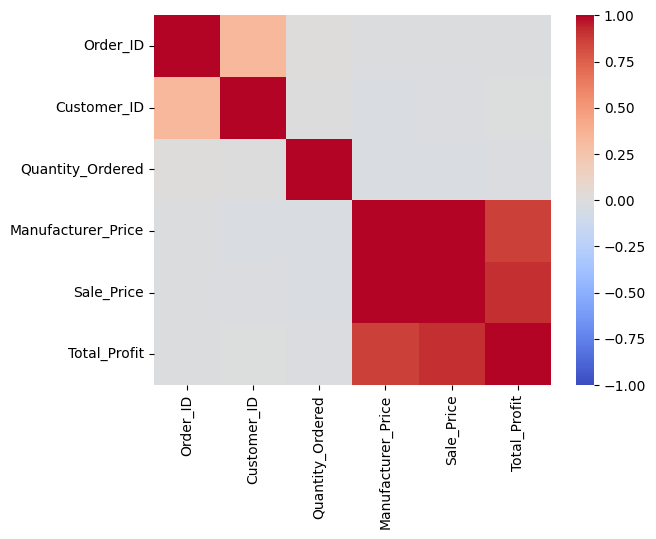

In [24]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

# Customer: Descriptive Statistic

In [25]:
customer.head()

,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Address,City,Postal Code,Sale Price,Phone
0,Hughes,Lewis,1234,Clothing,2022-12-24,12,Delivered,LA,49458 Glenwood Avenue,Shreveport,71101,564,504-870-1437
1,Gomez,Ali,1235,Home & Kitchen,2022-12-06,2,In Transit,LA,11591 River Road,Covington,70433,777,337-400-1567
2,Beck,Mila,1236,Personal Care,2022-12-01,7,Delivered,GA,48087 Jackson Street,Atlanta,30303,1829,404-573-7088
3,Juarez,Ryleigh,1237,Personal Care,2022-12-25,9,Delivered,NC,46798 Hillcrest Avenue,Columbia,29201,227,252-325-9603
4,Preston,Leonidas,1238,Electronics,2022-12-29,9,Shipped,GA,65693 Mulberry Street,Avondale Estates,30002,1355,404-383-9724


In [26]:
customer.tail()

,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Address,City,Postal Code,Sale Price,Phone
995,Robbins,Crew,2227,Pets,2022-12-23,12,Shipped,LA,68270 River Road,Shreveport,71101,1865,318-125-1831
996,Salinas,Willow,2228,Books,2022-12-25,4,Cancelled,GA,68706 Sixth Street,Bainbridge,39828,1050,404-248-4929
997,Bond,Malachi,2229,Pets,2022-12-23,20,Shipped,LA,36199 Fairview Avenue,Shreveport,71101,1059,318-485-3209
998,Willis,Patrick,2230,Sports & Outdoors,2022-12-14,16,Shipped,LA,62176 Cedar Street,Covington,70433,1116,337-795-4890
999,Compton,Dallas,2231,Electronics,2022-12-13,19,Delivered,NC,72481 Court Street,Asheville,28801,49,704-863-4035


In [27]:
customer.columns=clean_headers(customer.columns)

In [28]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer_Last_Name   1000 non-null   object        
 1   Customer_First_Name  1000 non-null   object        
 2   Customer_ID          1000 non-null   int64         
 3   Product_Category     1000 non-null   object        
 4   Order_Date           1000 non-null   datetime64[ns]
 5   Quantity_Ordered     1000 non-null   int64         
 6   Order_Status         1000 non-null   object        
 7   State                1000 non-null   object        
 8   Address              1000 non-null   object        
 9   City                 1000 non-null   object        
 10  Postal_Code          1000 non-null   int64         
 11  Sale_Price           1000 non-null   int64         
 12  Phone                1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), ob

In [29]:
customer.columns

Index(['Customer_Last_Name', 'Customer_First_Name', 'Customer_ID',
       'Product_Category', 'Order_Date', 'Quantity_Ordered', 'Order_Status',
       'State', 'Address', 'City', 'Postal_Code', 'Sale_Price', 'Phone'],
      dtype='object')

In [30]:
customer.isnull().sum()

Customer_Last_Name     0
Customer_First_Name    0
Customer_ID            0
Product_Category       0
Order_Date             0
Quantity_Ordered       0
Order_Status           0
State                  0
Address                0
City                   0
Postal_Code            0
Sale_Price             0
Phone                  0
dtype: int64

In [31]:
customer.duplicated().sum()

0

In [32]:
object_customer_columns = list(customer.select_dtypes(['object']).columns)
object_customer_columns.extend(["Postal_Code","Customer_ID"])
numeric_customer_columns=list(customer.select_dtypes('number'))
customer[object_customer_columns]=customer[object_customer_columns].astype('category')
category_customer_columns = list(customer.select_dtypes(['category']).columns)

print(f"Bien phan loai: {len(category_customer_columns)}, Bien lien tuc: {len(numeric_customer_columns)}")

Bien phan loai: 10, Bien lien tuc: 4


In [33]:
customer[category_customer_columns].describe()

,Customer_Last_Name,Customer_First_Name,Customer_ID,Product_Category,Order_Status,State,Address,City,Postal_Code,Phone
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,629,607,998,7,4,6,998,26,27,1000
top,Holt,Shiloh,1588,Electronics,Delivered,LA,81712 Main Street,Birmingham,35203,205-107-3912
freq,5,6,2,158,400,179,2,88,88,1


In [34]:
for column in category_customer_columns:
    print("\033[1m","*, Column: ", column,"\033[0m")
    print('\t',len(customer[column].unique()), "unique values", "\t & \t",
          customer[column].notnull().sum(), "non-null values\t",
          round(100* customer[column].notnull().sum()/len(customer[column]),2),
          "% non-null")
    if len(customer[column].unique())<=10:
            print('\t',customer[column].unique())

 *, Column:  Customer_Last_Name 
	 629 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  Customer_First_Name 
	 607 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  Customer_ID 
	 998 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  Product_Category 
	 7 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['Clothing', 'Home & Kitchen', 'Personal Care', 'Electronics', 'Pets', 'Sports & Outdoors', 'Books']
Categories (7, object): ['Books', 'Clothing', 'Electronics', 'Home & Kitchen', 'Personal Care',
                         'Pets', 'Sports & Outdoors']
 *, Column:  Order_Status 
	 4 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['Delivered', 'In Transit', 'Shipped', 'Cancelled']
Categories (4, object): ['Cancelled', 'Delivered', 'In Transit', 'Shipped']
 *, Column:  State 
	 6 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['LA', 'GA', 'NC', 'SC', 'AL', 'FL']
Categories (6, object):

In [35]:
for column in category_customer_columns:
    print('-'*100)
    print("*, Column: ", column)
    print(customer[column].value_counts())
    print('-'*100)


----------------------------------------------------------------------------------------------------
*, Column:  Customer_Last_Name
Customer_Last_Name
Holt       5
Nash       5
Wong       5
Singh      5
Case       4
          ..
Marsh      1
Manning    1
Mann       1
Malone     1
Ávila      1
Name: count, Length: 629, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  Customer_First_Name
Customer_First_Name
Shiloh      6
Patrick     5
Walter      5
Hayden      5
Sawyer      5
           ..
Carolina    1
Caroline    1
Killian     1
Kevin       1
Joel        1
Name: count, Length: 607, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  Custom

In [36]:
for column in category_customer_columns:
    customer[column].value_counts().iplot(kind='bar',title=column,
                                    xTitle=column,
                                    yTitle='Values')

In [37]:
customer[numeric_customer_columns].describe()

,Quantity_Ordered,Sale_Price
count,1000.000000,1000.000000
mean,10.567000,890.427000
std,5.768777,514.266924
min,1.000000,11.000000
25%,6.000000,431.750000
50%,11.000000,897.000000
75%,15.000000,1311.250000
max,20.000000,1904.000000


In [38]:
for column in numeric_customer_columns:
    print("*, Column: ", column)
    print(len(customer[column].unique()), "unique values", "\t & \t",
          customer[column].notnull().sum(), "non-null values\t",
          round(100* customer[column].notnull().sum()/len(customer[column]),2),
          "% non-null")
    if len(customer[column].unique())<=10:
        print(customer[column].unique())


*, Column:  Customer_ID
998 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Quantity_Ordered
20 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Postal_Code
27 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  Sale_Price
767 unique values 	 & 	 1000 non-null values	 100.0 % non-null


In [39]:
for c in numeric_customer_columns:
    customer[c].iplot(kind='hist',title=c,xTitle=c)
    plt.show()

In [40]:
outliers_list=[]
for col in numeric_customer_columns:
    check_outliers(customer,col,outliers_list)
# np.savez(f'{exps_dir}/data/outliers.npz', outliers = outliers_list)

print(outliers_list)

Q1:  1482.75 Q3:  1981.25 IQR: 498.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values [], Categories (998, int64): [1234, 1235, 1236, 1237, ..., 2228, 2229, 2230, 2231]
-----
Q1:  6.0 Q3:  15.0 IQR: 9.0
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
Q1:  29601.0 Q3:  36602.0 IQR: 7001.0
Indexes of outliers:  [18, 1, 22, 0]
Number of outliers:  4
Outlier values [70112, 70433, 70802, 71101]
Categories (27, int64): [27514, 28202, 28801, 29020, ..., 70112, 70433, 70802, 71101]
-----
Q1:  431.75 Q3:  1311.25 IQR: 879.5
Indexes of outliers:  []
Number of outliers:  0
Outlier values []
-----
['Postal_Code']


In [41]:
corrle=sale[numeric_columns].corr()
corrle

,Order_ID,Customer_ID,Quantity_Ordered,Manufacturer_Price,Sale_Price,Total_Profit
Order_ID,1.000000,0.332710,0.011131,-0.013438,-0.013793,-0.013789
Customer_ID,0.332710,1.000000,0.003953,-0.026497,-0.022206,-0.001311
Quantity_Ordered,0.011131,0.003953,1.000000,-0.024396,-0.023450,-0.016787
Manufacturer_Price,-0.013438,-0.026497,-0.024396,1.000000,0.995305,0.864869
Sale_Price,-0.013793,-0.022206,-0.023450,0.995305,1.000000,0.909398
Total_Profit,-0.013789,-0.001311,-0.016787,0.864869,0.909398,1.000000


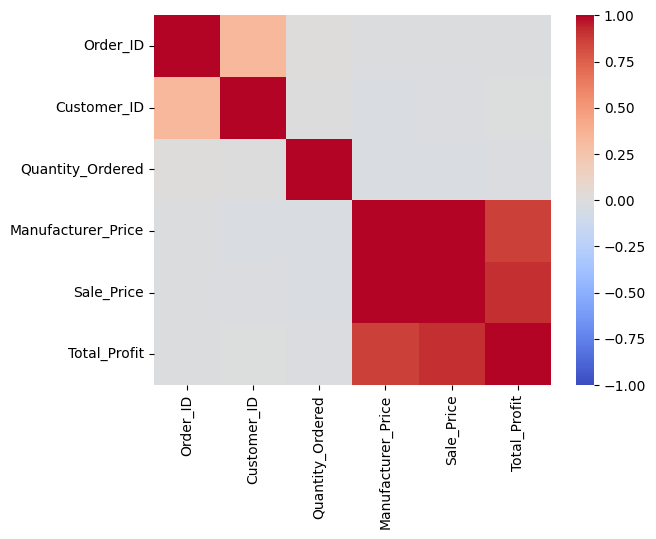

In [42]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()